In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from matplotlib import pyplot as plt

from models.cir import CoxIngersollRossModel

warnings.simplefilter('ignore', FutureWarning)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('./data_processing/data/ru_interest_rate.csv', parse_dates=[0])
df.head()

,date,interest_rate
0,2013-09-13,5.5
1,2013-09-14,5.5
2,2013-09-15,5.5
3,2013-09-16,5.5
4,2013-09-17,5.5


In [5]:
monthly_rate = df.groupby(
    df['date'].dt.strftime('%Y-%m-1')
)['interest_rate'].apply(lambda group: list(group)[0]).reset_index()
monthly_rate['date'] = pd.to_datetime(monthly_rate['date'])
monthly_rate.head()

,date,interest_rate
0,2013-09-01,5.5
1,2013-10-01,5.5
2,2013-11-01,5.5
3,2013-12-01,5.5
4,2014-01-01,5.5


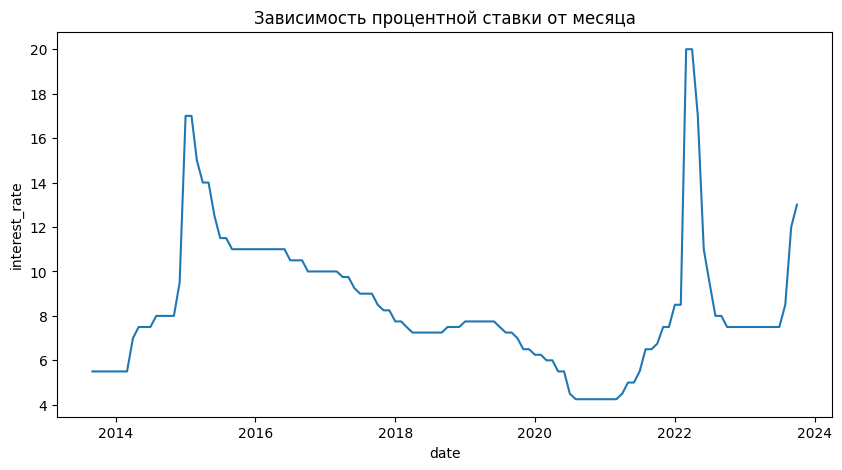

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_rate, x='date', y='interest_rate')
plt.title('Зависимость процентной ставки от месяца');

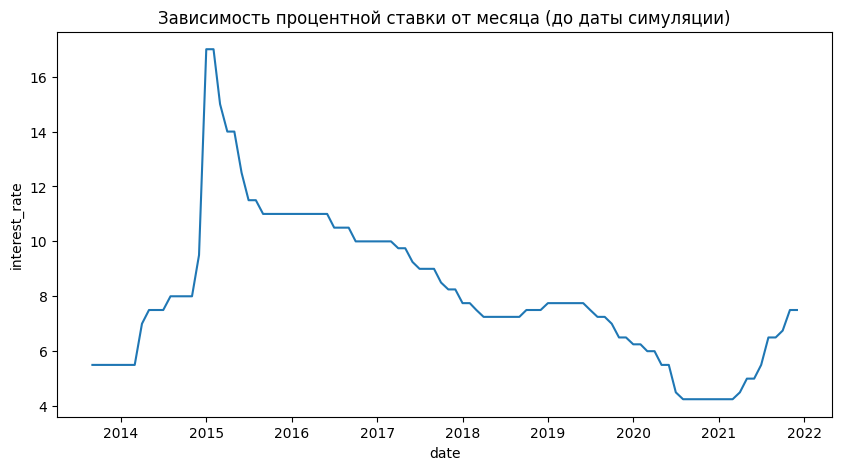

In [7]:
simulation_date = datetime.datetime(2021, 12, 10)
monthly_rate = monthly_rate[monthly_rate['date'] < simulation_date]
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_rate, x='date', y='interest_rate')
plt.title('Зависимость процентной ставки от месяца (до даты симуляции)');

In [13]:
r_start = 7.5
N = 12
T = 1
delta_t = T / N

cir = CoxIngersollRossModel(delta_t=delta_t)
cir.estimate_ols(monthly_rate['interest_rate'])
print(cir)

N_SIMULATIONS = 1000
TIME_STEPS_SIMULATIONS = 12
simulated_rate, expected_value, expected_error = cir.make_interest_rate_simulations(r_start, N_SIMULATIONS, TIME_STEPS_SIMULATIONS)
print("The expected value for the interest rate is:", "{}".format(expected_value))
print("The standard error of sample mean is:", "{}".format(expected_error))

CIR(a=0.42211089107228483, b=8.685425225130833, sigma=0.9852936710551216)
The expected value for the interest rate is: 7.9602526987343145
The standard error of sample mean is: 0.07177666708976921


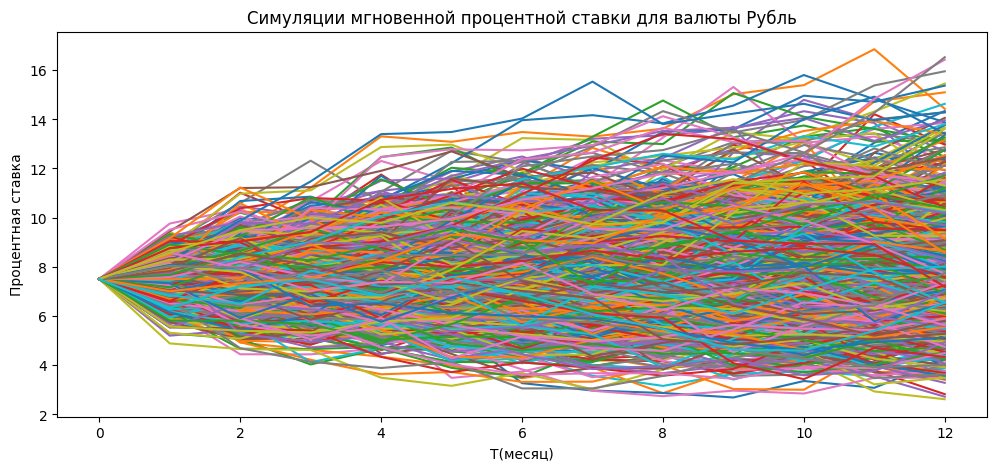

In [15]:
plt.figure(figsize=(12, 5))

for simulation in simulated_rate:
    plt.plot(np.arange(0, TIME_STEPS_SIMULATIONS + 1, 1), simulation)
plt.title('Симуляции мгновенной процентной ставки для валюты Рубль')
plt.xlabel('T(месяц)')
plt.ylabel('Процентная ставка');